In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


df = pd.read_csv("../data/benin-malanville.csv")
df.head()

Matplotlib is building the font cache; this may take a moment.


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics & Missing Value Report

We begin by examining basic statistics and checking for missing values:

- Negative values were found in `GHI`, `DNI`, and `DHI`, which are not physically meaningful and will be addressed during the cleaning phase.
- The `Comments` column is 100% null and will be dropped.
- No other columns have more than 5% missing data, which suggests the dataset is mostly complete.

In [2]:
summary_stats = df.describe()
missing_values = df.isna().sum()
threshold = 0.05 * len(df)
high_nulls = missing_values[missing_values > threshold]
print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Count:\n", missing_values)
print("\nColumns with >5% Missing Values:\n", high_nulls)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

In [5]:
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = df[outlier_cols].apply(zscore)

outliers = (np.abs(z_scores) > 3).any(axis=1)

# Count and preview outliers
print(f"Number of rows with outliers: {outliers.sum()}")
df_outliers = df[outliers]
df_outliers.head()

Number of rows with outliers: 7740


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7,NaN
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,NaN
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3,NaN
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2,NaN
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,NaN


In [6]:
df.drop(columns=['Comments'], inplace=True)

In [7]:
irr_cols = ['GHI', 'DNI', 'DHI']
for col in irr_cols:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [9]:
df.to_csv("../data/benin_clean.csv", index=False)

## Cleaning & Handling Outliers

After identifying 7,740 rows with outliers (using Z-scores), we cleaned the data as follows:

- Dropped the `Comments` column, which had 100% missing values.
- Replaced negative values in irradiance columns (`GHI`, `DNI`, `DHI`) with `NaN`, as they are physically invalid.
- Imputed missing and outlier-corrected values in key sensor and weather columns using the **median**, to preserve central tendencies while reducing the influence of extremes.


In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df.sort_values('Timestamp', inplace=True)

df.set_index('Timestamp', inplace=True)

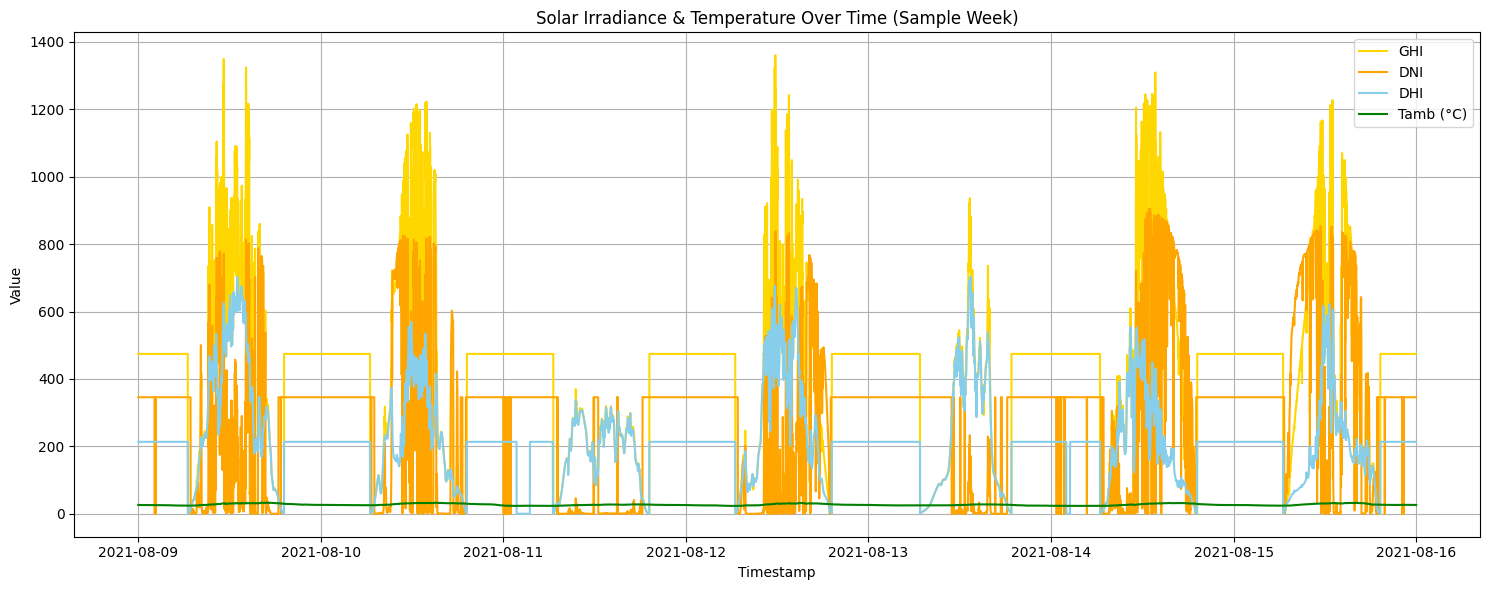

In [11]:
sample_df = df.loc['2021-08-09':'2021-08-15'] 

plt.figure(figsize=(15, 6))
plt.plot(sample_df.index, sample_df['GHI'], label='GHI', color='gold')
plt.plot(sample_df.index, sample_df['DNI'], label='DNI', color='orange')
plt.plot(sample_df.index, sample_df['DHI'], label='DHI', color='skyblue')
plt.plot(sample_df.index, sample_df['Tamb'], label='Tamb (°C)', color='green')
plt.title('Solar Irradiance & Temperature Over Time (Sample Week)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

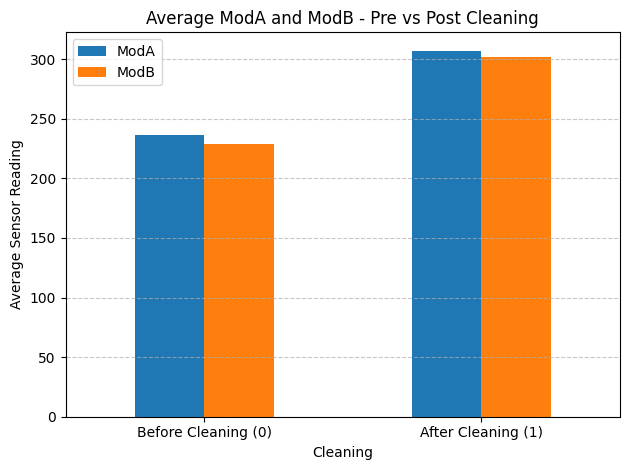

In [12]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

plt.figure(figsize=(8, 5))
cleaning_impact.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Average ModA and ModB - Pre vs Post Cleaning')
plt.ylabel('Average Sensor Reading')
plt.xticks(ticks=[0, 1], labels=['Before Cleaning (0)', 'After Cleaning (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

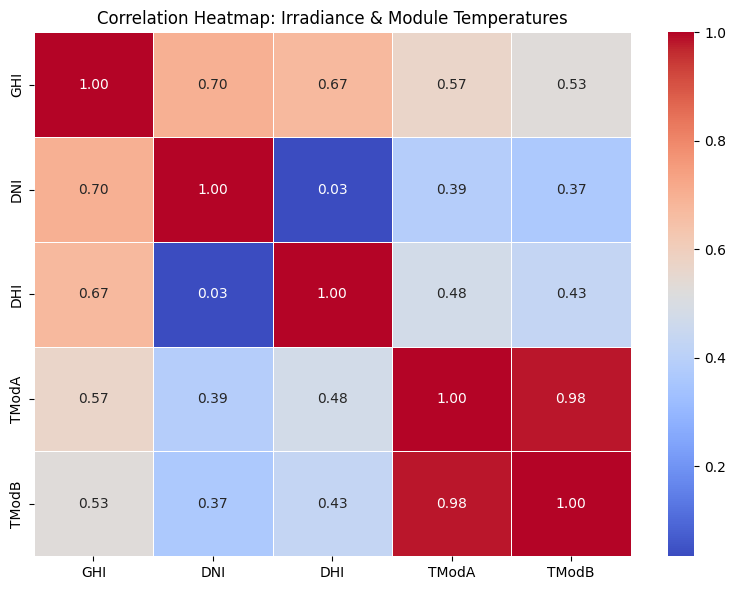

In [13]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Irradiance & Module Temperatures")
plt.tight_layout()
plt.show()

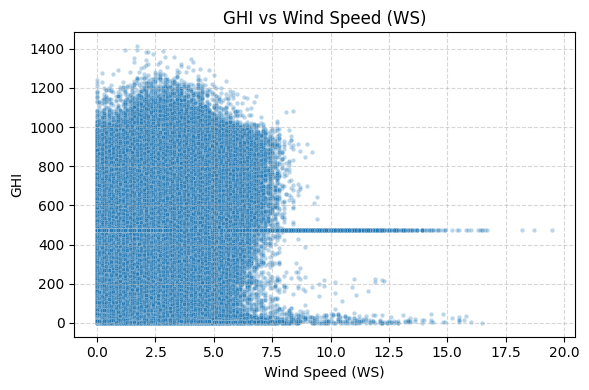

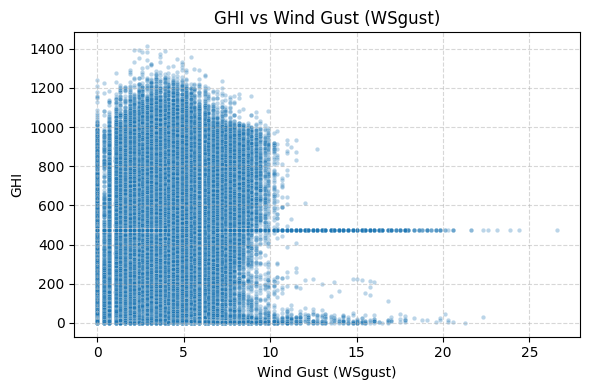

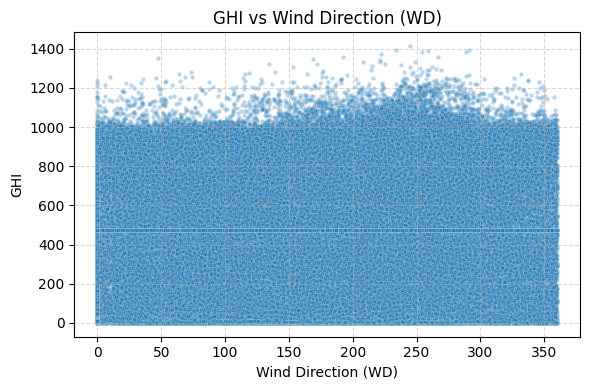

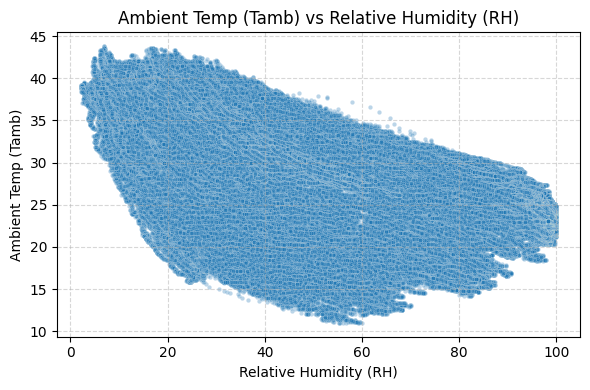

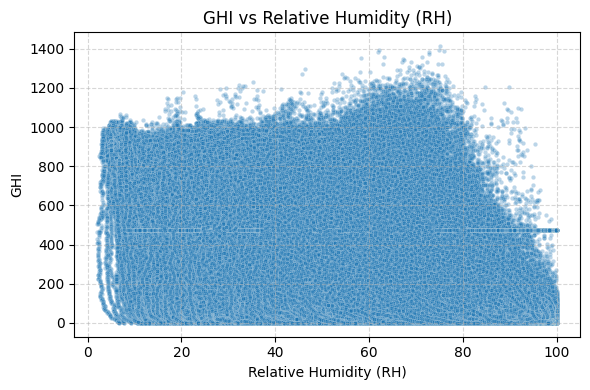

In [14]:
def plot_scatter(x, y, xlabel, ylabel):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.3, s=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs {xlabel}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Scatter plots
plot_scatter('WS', 'GHI', 'Wind Speed (WS)', 'GHI')
plot_scatter('WSgust', 'GHI', 'Wind Gust (WSgust)', 'GHI')
plot_scatter('WD', 'GHI', 'Wind Direction (WD)', 'GHI')
plot_scatter('RH', 'Tamb', 'Relative Humidity (RH)', 'Ambient Temp (Tamb)')
plot_scatter('RH', 'GHI', 'Relative Humidity (RH)', 'GHI')

C:\Users\DON\AppData\Local\Temp\ipykernel_13048\1121578057.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_data = df.groupby(['WS_bin', pd.cut(df['WD'], bins=range(0, 370, 30))]).size().unstack().fillna(0)


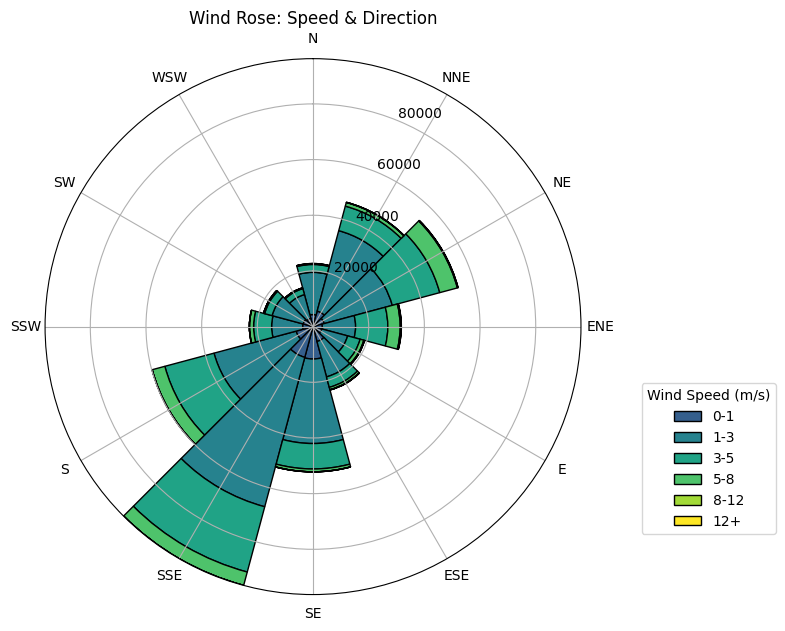

In [16]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define wind speed bins
bins = [0, 1, 3, 5, 8, 12, 20]
bin_labels = ['0-1', '1-3', '3-5', '5-8', '8-12', '12+']
df['WS_bin'] = pd.cut(df['WS'], bins=bins, labels=bin_labels, right=False)

# Group by wind direction and speed bins
wind_data = df.groupby(['WS_bin', pd.cut(df['WD'], bins=range(0, 370, 30))]).size().unstack().fillna(0)

# Plot wind rose
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

angles = np.deg2rad(np.arange(0, 360, 30))
width = np.deg2rad(30)
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW']
colors = cm.viridis(np.linspace(0.3, 1, len(wind_data.index)))

# Stack bars for each wind speed bin
bottom = np.zeros(len(angles))
for idx, (bin_label, color) in enumerate(zip(wind_data.index, colors)):
    values = wind_data.loc[bin_label].values
    ax.bar(angles, values, width=width, bottom=bottom, color=color, edgecolor='black', label=bin_label)
    bottom += values

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels(directions)
ax.set_title("Wind Rose: Speed & Direction")
ax.legend(title='Wind Speed (m/s)', loc='lower left', bbox_to_anchor=(1.1, 0.1))
plt.tight_layout()
plt.show()

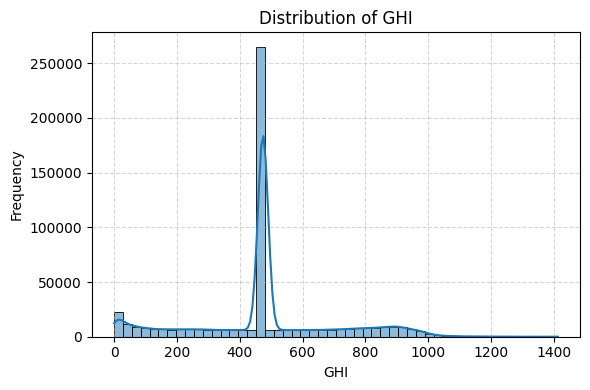

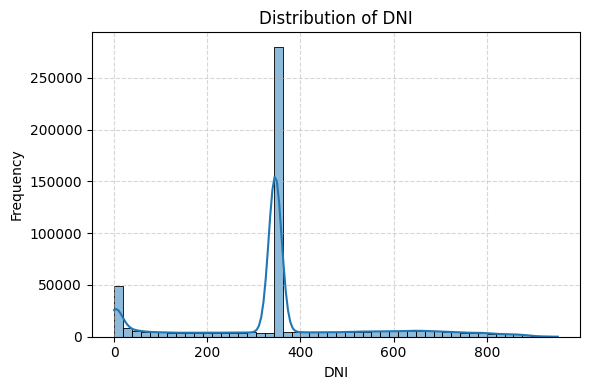

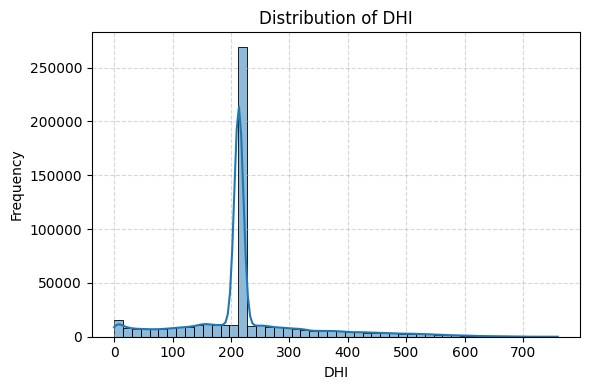

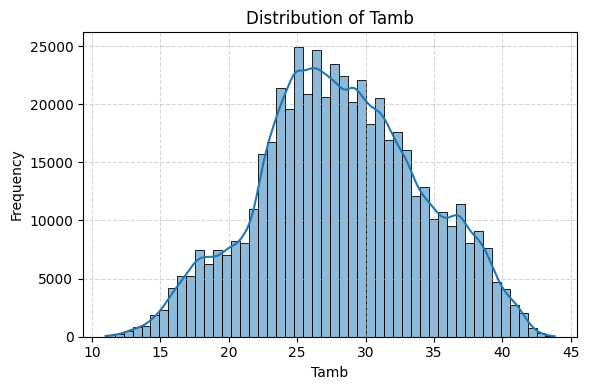

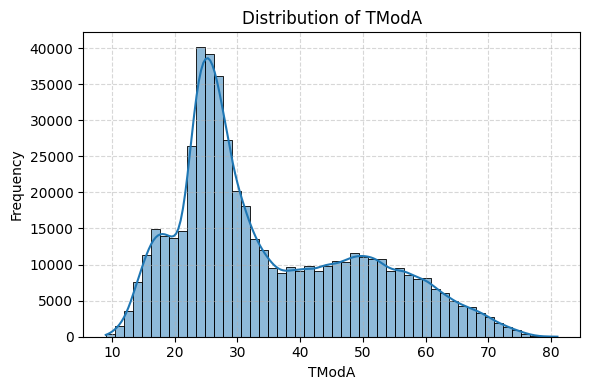

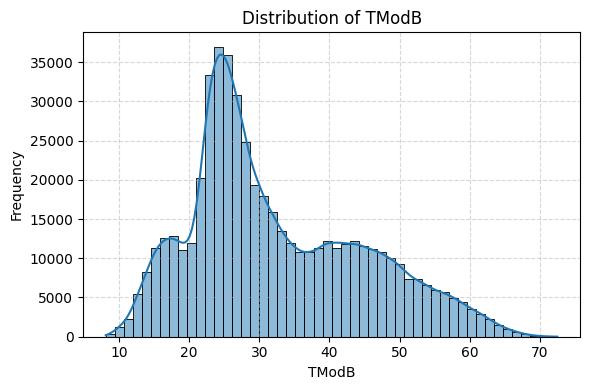

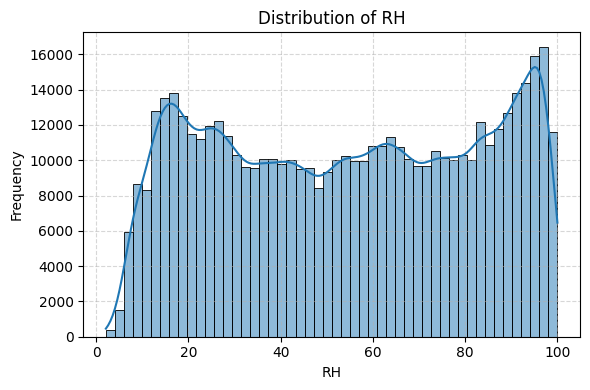

In [17]:
# Plot distributions
dist_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'RH']

for col in dist_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

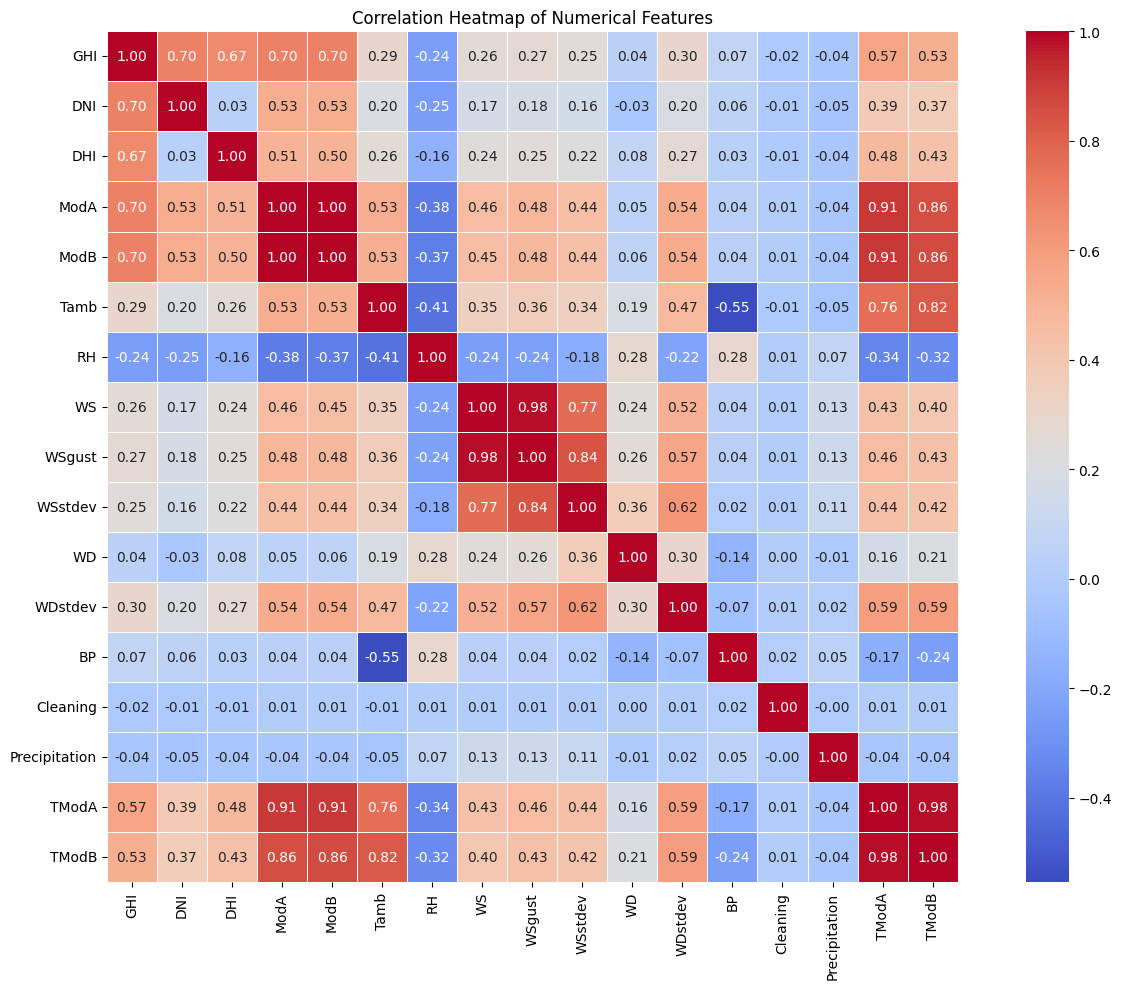

In [18]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()